In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_ds="/kaggle/input/traffic-net/trafficnet_dataset_v1/train"
test_ds="/kaggle/input/traffic-net/trafficnet_dataset_v1/test"

# Data preprocessing
****

In [4]:
root_path = "/kaggle/input/traffic-net/trafficnet_dataset_v1/train/"
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(root_path + name)) for name in class_names]
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")
print(f"female : {class_dis[0]} \nmale : {class_dis[1]}")

Total Number of Classes : 4 
Class Names : ['accident', 'dense_traffic', 'fire', 'sparse_traffic']
female : 900 
male : 900


In [5]:
import plotly.express as px

# Training Class Distribution

In [6]:
fig = px.pie(names=class_names, values=class_dis,
             title="Training Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Test Class Distribution

In [7]:
valid_path = "/kaggle/input/traffic-net/trafficnet_dataset_v1/test/"
valid_dis = [len(os.listdir(valid_path + name)) for name in class_names]
fig = px.pie(names=class_names, values=valid_dis,
             title="test Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

In [8]:
os.listdir('/kaggle/input/traffic-net/trafficnet_dataset_v1/train')

['fire', 'sparse_traffic', 'accident', 'dense_traffic']

In [9]:
batch_size=32
img_size=224

In [10]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 3600 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [11]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [12]:
img= train_generator[0]
print(img)

(array([[[[0.05882353, 0.05490196, 0.04705883],
         [0.05882353, 0.05490196, 0.04705883],
         [0.05882353, 0.05490196, 0.04705883],
         ...,
         [0.03635437, 0.03635437, 0.02851123],
         [0.03921569, 0.03921569, 0.03137255],
         [0.03921569, 0.03921569, 0.03137255]],

        [[0.05882353, 0.05490196, 0.04705883],
         [0.05882353, 0.05490196, 0.04705883],
         [0.05882353, 0.05490196, 0.04705883],
         ...,
         [0.03635437, 0.03635437, 0.02851123],
         [0.03921569, 0.03921569, 0.03137255],
         [0.03921569, 0.03921569, 0.03137255]],

        [[0.05882353, 0.05490196, 0.04705883],
         [0.05882353, 0.05490196, 0.04705883],
         [0.05882353, 0.05490196, 0.04705883],
         ...,
         [0.03635437, 0.03635437, 0.02851123],
         [0.03921569, 0.03921569, 0.03137255],
         [0.03921569, 0.03921569, 0.03137255]],

        ...,

        [[0.49752828, 0.23478319, 0.20341064],
         [0.49752828, 0.23478319, 0.20341064

In [13]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [14]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 4)


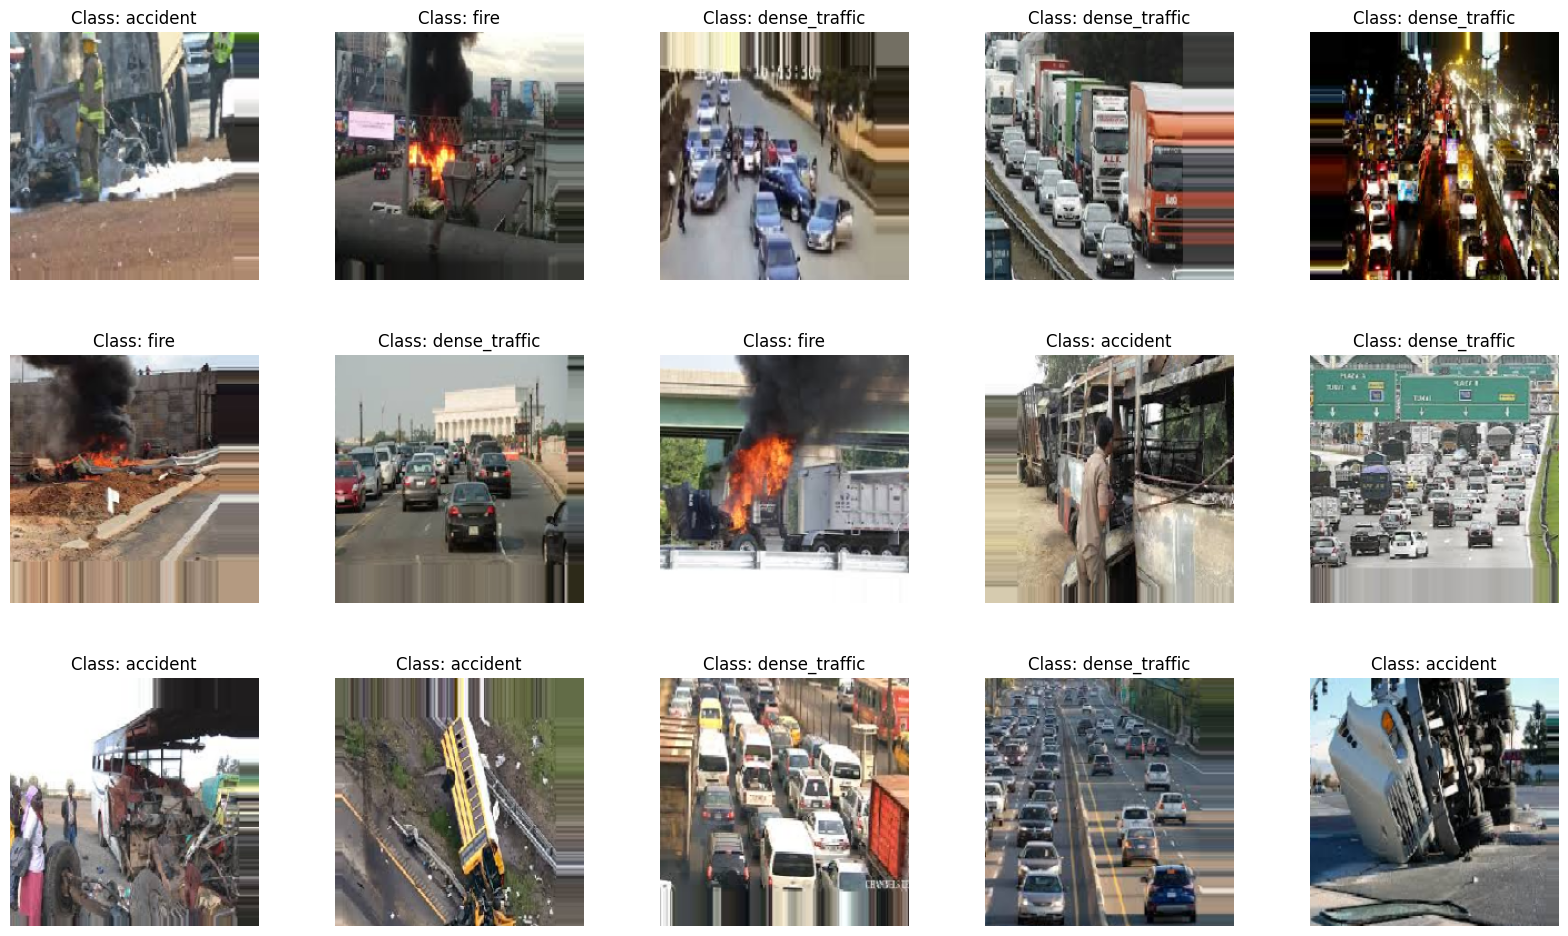

In [15]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [16]:
print(len(train_generator))
print(len(test_ds))

113
52


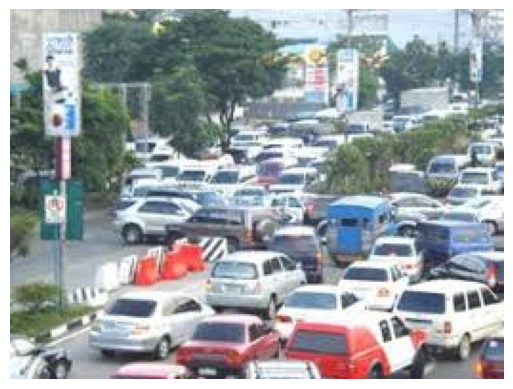

In [19]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/traffic-net/trafficnet_dataset_v1/train/dense_traffic/images_236 (3).jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [21]:
from keras.layers import MaxPool2D

In [24]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

# Build MobileNet Model

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

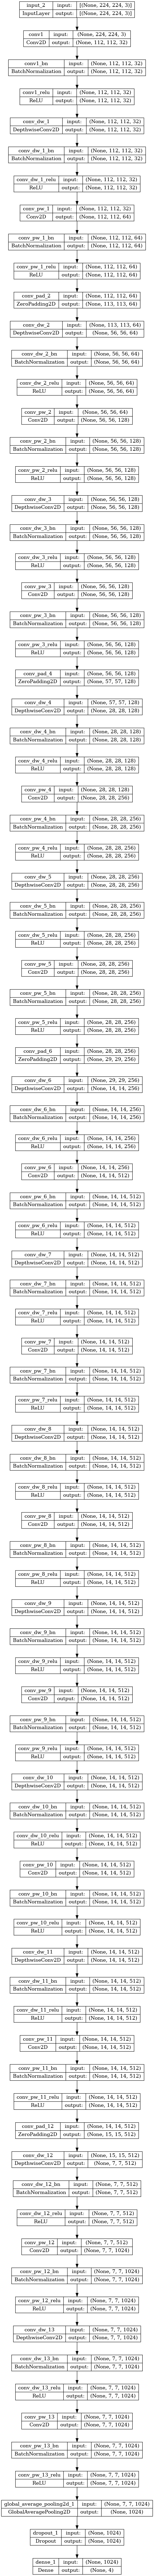

In [26]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.utils import plot_model
from keras.applications.mobilenet import MobileNet
def mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = MobileNet(include_top=False, input_tensor=input_tensor)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(4, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)

    return model


input_shape = (224, 224, 3)
num_classes =4

model = mobilenet(input_shape)
model.summary()
plot_model(model, to_file='mobilenet.png', show_shapes=True)

In [27]:
model = mobilenet((224, 224, 3))

#   Model summary

In [28]:
# Print the model summary

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [30]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [31]:
history =model.fit(train_generator, validation_data=test_generator, epochs=20)

Epoch 1/20
113/113 [==============================] - 79s 606ms/step - loss: 0.5629 - accuracy: 0.7900 - val_loss: 0.8813 - val_accuracy: 0.7337
Epoch 2/20
113/113 [==============================] - 46s 407ms/step - loss: 0.2517 - accuracy: 0.9122 - val_loss: 0.3888 - val_accuracy: 0.8763
Epoch 3/20
113/113 [==============================] - 47s 419ms/step - loss: 0.1825 - accuracy: 0.9317 - val_loss: 0.2419 - val_accuracy: 0.9162
Epoch 4/20
113/113 [==============================] - 46s 409ms/step - loss: 0.1354 - accuracy: 0.9539 - val_loss: 0.2916 - val_accuracy: 0.9187
Epoch 5/20
113/113 [==============================] - 47s 416ms/step - loss: 0.1107 - accuracy: 0.9592 - val_loss: 0.2439 - val_accuracy: 0.9237
Epoch 6/20
113/113 [==============================] - 46s 409ms/step - loss: 0.1064 - accuracy: 0.9619 - val_loss: 0.2433 - val_accuracy: 0.9250
Epoch 7/20
113/113 [==============================] - 48s 420ms/step - loss: 0.0777 - accuracy: 0.9719 - val_loss: 0.2590 - val_ac

In [32]:
n_categories = len(os.listdir('/kaggle/input/traffic-net/trafficnet_dataset_v1/test'))# number of categories print(n_categories)

In [33]:
n_categories

4

In [34]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,0.562861,0.790000,0.881335,0.73375
1,0.251692,0.912222,0.388823,0.87625
2,0.182544,0.931667,0.241871,0.91625
3,0.135375,0.953889,0.291575,0.91875
4,0.110683,0.959167,0.243920,0.92375


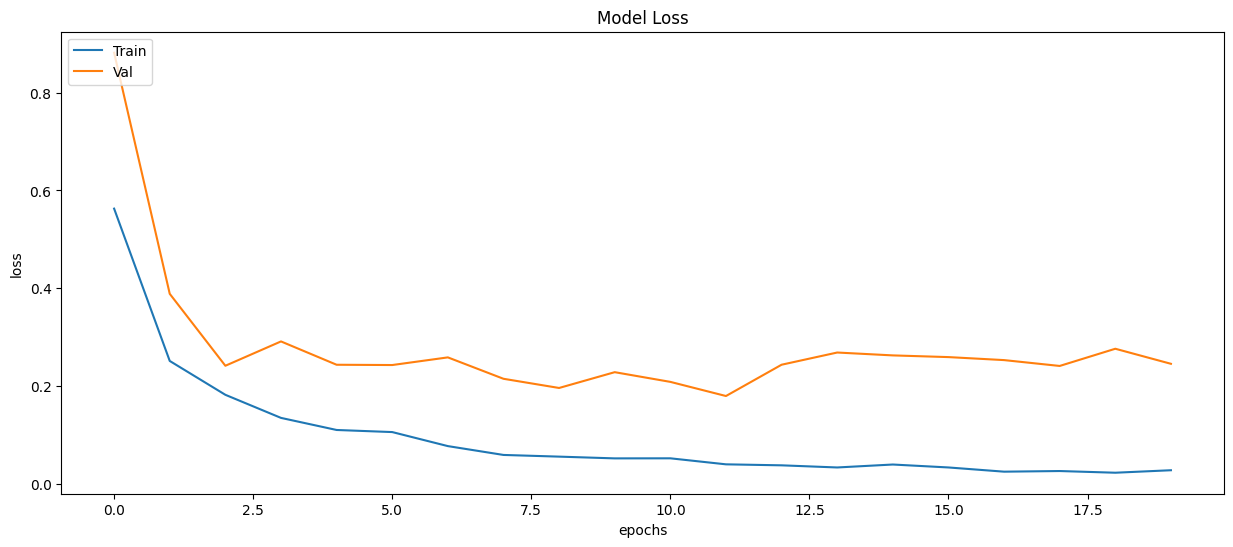

In [35]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

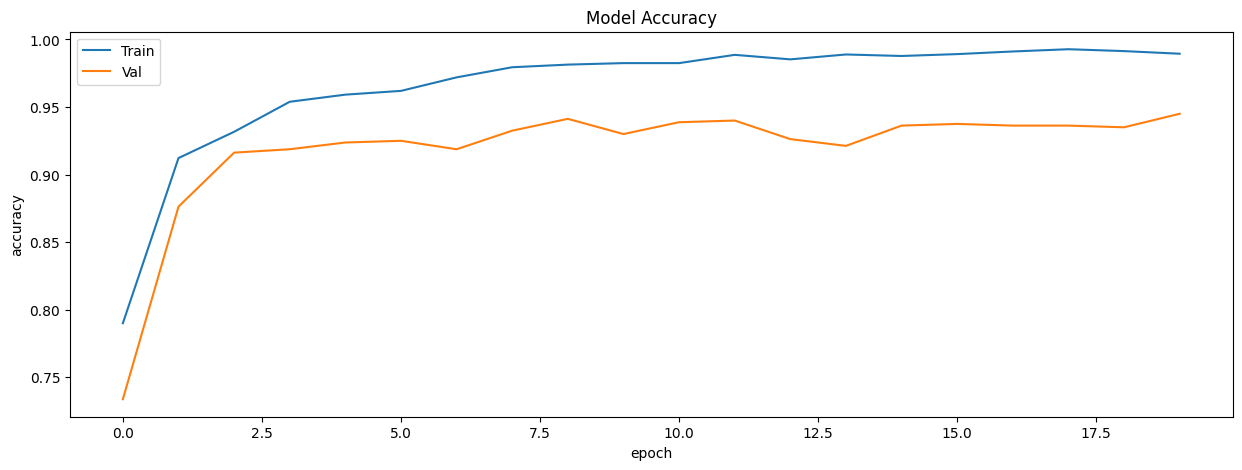

In [36]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [37]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

25/25 [==============================] - 2s 68ms/step


In [38]:
results =model.evaluate(test_generator)

25/25 [==============================] - 2s 68ms/step - loss: 0.2459 - accuracy: 0.9450


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       200
           1       0.95      0.97      0.96       200
           2       0.95      0.98      0.97       200
           3       0.92      0.93      0.92       200

    accuracy                           0.94       800
   macro avg       0.95      0.95      0.94       800
weighted avg       0.95      0.94      0.94       800



7/7 [==============================] - 1s 78ms/step


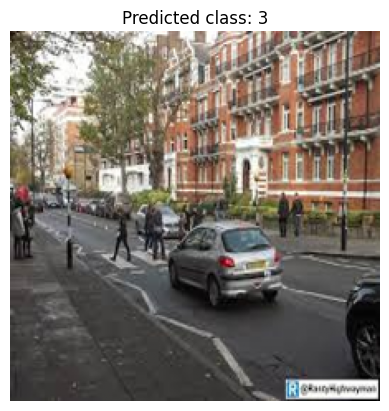

In [40]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/traffic-net/trafficnet_dataset_v1/test/sparse_traffic'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [41]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : sparse_traffic
Class probability: 0.98913234
Predicted class for 2.jpg : sparse_traffic
Class probability: 0.99988186
Predicted class for 3.jpg : sparse_traffic
Class probability: 0.93212163
Predicted class for 4.jpg : sparse_traffic
Class probability: 0.9992442
Predicted class for 5.jpg : dense_traffic
Class probability: 0.97052336
Predicted class for 6.jpg : dense_traffic
Class probability: 0.9983917
Predicted class for 7.jpg : sparse_traffic
Class probability: 0.99907863
Predicted class for 8.jpg : sparse_traffic
Class probability: 0.9999995
Predicted class for 9.jpg : sparse_traffic
Class probability: 0.99944335
Predicted class for 10.jpg : sparse_traffic
Class probability: 0.9999502
Predicted class for 11.jpg : sparse_traffic
Class probability: 0.99999344
Predicted class for 12.jpg : sparse_traffic
Class probability: 0.99999964
Predicted class for 13.jpg : dense_traffic
Class probability: 0.9771452
Predicted class for 14.jpg : sparse_traffic
Class proba

# Thank You !